In [176]:
from keras import models
from keras import layers
import numpy as np
import math
import json

In [177]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(800,)))
model.add(layers.Dropout(0.13))
model.add(layers.Dense(64,activation='relu',input_shape=(800,)))
model.add(layers.Dropout(0.13))
model.add(layers.Dense(45,activation='softmax'))

In [178]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [179]:
obj_r=open("./test/json/datasetx_train2.json")
obj_r2 = open("./test/json/datasetx_result2.json")
input_train = json.load(obj_r)
valid_x = np.array(input_train)[:50]
input_train = np.array(input_train)[50:]
y = json.load(obj_r2)
y = np.array(y)
y = y*2093.004

In [180]:
def fre_to_note_piano(fre):
    index = round(math.log(fre / 27.5,2**(1/12)))
    dict = ["A1 ","#A1 ","B1 ","C2 ","#C2 ","D2 ","#D2 ","E2 ","F2 ","#F2 ","G2 ","#G2 ","A2 ","#A2 ","B2 ","C3 ","#C3 ","D3 ","#D3 ","E3 ","F3 ","#F3 ","G3 ","#G3 ","A3 ","#A3 ","B3 ","C4 ","#C4 ","D4 ","#D4 ","E4 ","F4 ","#F4 ","G4 ","#G4 ","A4 ", "#A4 ", "B4 ", "C5 ", "#C5 ", "D5 ", "#D5 ", "E5 ","F5 ","#F5 ","G5 ","#G5 ","A5 ", "#A5 ", "B5 ", "C6 ", "#C6 ", "D6 ", "#D6 ", "E6 ",
    "F6 ","#F6 ","G6 ","#G6 ","A6 ", "#A6 ", "B6 ", "C7 ", "#C7 ", "D7 ", "#D7 ", "E7 ","F7 ","#F7 ","G7 ","#G7 ","A7 ", "#A7 ", "B7 ", "C8 ","#C8 ","D8 ","#D8 ","E8 ","F8 ","#F8 ","G8 ","#G8 ","A8 ","#A8 ","B8 ","C9 ","#C9 ", "D9 ", "#D9 ", "E9 ","F9 ","#F9 ","G9 ","#G9 ","A9 ", "#A9 ", "B9 ", "C10 "]
    return index+21
y_train = np.zeros((len(y),45))
test_standard = []
for i in range(len(y)):
    index = fre_to_note_piano(y[i])
    y_train[i][index-40] = 1
valid_y = y_train[:50]
y_train = y_train[50:]

In [181]:
history=model.fit(input_train,y_train,batch_size=10,epochs=400,validation_data=(valid_x,valid_y))

Train on 706 samples, validate on 50 samples
Epoch 1/400
706/706 [==============================] - 2s 2ms/step - loss: 3.7615 - acc: 0.0963 - val_loss: 3.6826 - val_acc: 0.2000
Epoch 2/400
706/706 [==============================] - 0s 290us/step - loss: 3.5365 - acc: 0.2748 - val_loss: 3.3813 - val_acc: 0.3400
Epoch 3/400
706/706 [==============================] - 0s 215us/step - loss: 3.1477 - acc: 0.4079 - val_loss: 2.9463 - val_acc: 0.4600
Epoch 4/400
706/706 [==============================] - 0s 259us/step - loss: 2.6849 - acc: 0.5042 - val_loss: 2.4389 - val_acc: 0.5600
Epoch 5/400
706/706 [==============================] - 0s 227us/step - loss: 2.1851 - acc: 0.6176 - val_loss: 1.8724 - val_acc: 0.7400
Epoch 6/400
706/706 [==============================] - 0s 224us/step - loss: 1.7432 - acc: 0.7252 - val_loss: 1.3707 - val_acc: 0.8600
Epoch 7/400
706/706 [==============================] - 0s 226us/step - loss: 1.3830 - acc: 0.7564 - val_loss: 1.0191 - val_acc: 0.8400
Epoch 8/400


Epoch 61/400
706/706 [==============================] - 0s 188us/step - loss: 0.0846 - acc: 0.9816 - val_loss: 0.0704 - val_acc: 0.9600
Epoch 62/400
706/706 [==============================] - 0s 182us/step - loss: 0.0735 - acc: 0.9773 - val_loss: 0.1007 - val_acc: 0.9600
Epoch 63/400
706/706 [==============================] - 0s 203us/step - loss: 0.0500 - acc: 0.9858 - val_loss: 0.1322 - val_acc: 0.9600
Epoch 64/400
706/706 [==============================] - 0s 249us/step - loss: 0.0557 - acc: 0.9830 - val_loss: 0.0994 - val_acc: 0.9600
Epoch 65/400
706/706 [==============================] - 0s 233us/step - loss: 0.0795 - acc: 0.9773 - val_loss: 0.1000 - val_acc: 0.9600
Epoch 66/400
706/706 [==============================] - 0s 206us/step - loss: 0.0545 - acc: 0.9873 - val_loss: 0.0983 - val_acc: 0.9600
Epoch 67/400
706/706 [==============================] - 0s 194us/step - loss: 0.0859 - acc: 0.9788 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 68/400
706/706 [==========================

706/706 [==============================] - 0s 249us/step - loss: 0.0225 - acc: 0.9929 - val_loss: 0.0551 - val_acc: 0.9600
Epoch 122/400
706/706 [==============================] - 0s 175us/step - loss: 0.0311 - acc: 0.9943 - val_loss: 0.0466 - val_acc: 0.9800
Epoch 123/400
706/706 [==============================] - 0s 216us/step - loss: 0.0272 - acc: 0.9929 - val_loss: 0.1101 - val_acc: 0.9600
Epoch 124/400
706/706 [==============================] - 0s 380us/step - loss: 0.0345 - acc: 0.9873 - val_loss: 0.1327 - val_acc: 0.9600
Epoch 125/400
706/706 [==============================] - 0s 202us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0731 - val_acc: 0.9600
Epoch 126/400
706/706 [==============================] - 0s 199us/step - loss: 0.0526 - acc: 0.9887 - val_loss: 0.1459 - val_acc: 0.9600
Epoch 127/400
706/706 [==============================] - 0s 186us/step - loss: 0.0230 - acc: 0.9929 - val_loss: 0.1342 - val_acc: 0.9600
Epoch 128/400
706/706 [==============================] 

Epoch 181/400
706/706 [==============================] - 0s 199us/step - loss: 0.0249 - acc: 0.9958 - val_loss: 0.1416 - val_acc: 0.9600
Epoch 182/400
706/706 [==============================] - 0s 212us/step - loss: 0.0277 - acc: 0.9929 - val_loss: 0.0933 - val_acc: 0.9600
Epoch 183/400
706/706 [==============================] - 0s 229us/step - loss: 0.0188 - acc: 0.9943 - val_loss: 0.0790 - val_acc: 0.9600
Epoch 184/400
706/706 [==============================] - 0s 201us/step - loss: 0.0064 - acc: 0.9972 - val_loss: 0.1811 - val_acc: 0.9600
Epoch 185/400
706/706 [==============================] - 0s 217us/step - loss: 0.0375 - acc: 0.9901 - val_loss: 0.1092 - val_acc: 0.9600
Epoch 186/400
706/706 [==============================] - 0s 200us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9600
Epoch 187/400
706/706 [==============================] - 0s 208us/step - loss: 0.0087 - acc: 0.9986 - val_loss: 0.2313 - val_acc: 0.9600
Epoch 188/400
706/706 [==================

Epoch 241/400
706/706 [==============================] - 0s 192us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.2193 - val_acc: 0.9600
Epoch 242/400
706/706 [==============================] - 0s 213us/step - loss: 0.0113 - acc: 0.9943 - val_loss: 0.1980 - val_acc: 0.9600
Epoch 243/400
706/706 [==============================] - 0s 213us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.1022 - val_acc: 0.9600
Epoch 244/400
706/706 [==============================] - 0s 215us/step - loss: 0.0217 - acc: 0.9958 - val_loss: 0.1004 - val_acc: 0.9800
Epoch 245/400
706/706 [==============================] - 0s 210us/step - loss: 0.0179 - acc: 0.9958 - val_loss: 0.1356 - val_acc: 0.9800
Epoch 246/400
706/706 [==============================] - 0s 185us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.1406 - val_acc: 0.9800
Epoch 247/400
706/706 [==============================] - 0s 185us/step - loss: 0.0085 - acc: 0.9958 - val_loss: 0.1073 - val_acc: 0.9800
Epoch 248/400
706/706 [==================

Epoch 301/400
706/706 [==============================] - 0s 192us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.2116 - val_acc: 0.9600
Epoch 302/400
706/706 [==============================] - 0s 198us/step - loss: 0.0120 - acc: 0.9943 - val_loss: 0.2485 - val_acc: 0.9400
Epoch 303/400
706/706 [==============================] - 0s 194us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.2085 - val_acc: 0.9400
Epoch 304/400
706/706 [==============================] - 0s 196us/step - loss: 0.0096 - acc: 0.9972 - val_loss: 0.1940 - val_acc: 0.9800
Epoch 305/400
706/706 [==============================] - 0s 195us/step - loss: 0.0068 - acc: 0.9972 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 306/400
706/706 [==============================] - 0s 205us/step - loss: 0.0034 - acc: 0.9986 - val_loss: 0.1404 - val_acc: 0.9600
Epoch 307/400
706/706 [==============================] - 0s 208us/step - loss: 0.0101 - acc: 0.9972 - val_loss: 0.1699 - val_acc: 0.9400
Epoch 308/400
706/706 [==================

Epoch 361/400
706/706 [==============================] - 0s 209us/step - loss: 0.0068 - acc: 0.9972 - val_loss: 0.1198 - val_acc: 0.9400
Epoch 362/400
706/706 [==============================] - 0s 220us/step - loss: 0.0082 - acc: 0.9986 - val_loss: 0.0408 - val_acc: 0.9800
Epoch 363/400
706/706 [==============================] - 0s 202us/step - loss: 0.0285 - acc: 0.9943 - val_loss: 0.0465 - val_acc: 0.9800
Epoch 364/400
706/706 [==============================] - 0s 206us/step - loss: 0.0032 - acc: 0.9986 - val_loss: 0.0217 - val_acc: 1.0000
Epoch 365/400
706/706 [==============================] - 0s 210us/step - loss: 0.0023 - acc: 0.9986 - val_loss: 0.0194 - val_acc: 0.9800
Epoch 366/400
706/706 [==============================] - 0s 206us/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0462 - val_acc: 0.9600
Epoch 367/400
706/706 [==============================] - 0s 199us/step - loss: 0.0203 - acc: 0.9958 - val_loss: 0.1115 - val_acc: 0.9600
Epoch 368/400
706/706 [==================

In [182]:
obj_r=open("./test/json/datasetx_train3.json")
obj_r2 = open("./test/json/datasetx_result3.json")
test = json.load(obj_r)
test = np.array(test)
t = json.load(obj_r2)
t = np.array(t)
t = t*2093.004

In [183]:
for j in range(len(t)):
    index = fre_to_note_piano(t[j])
    test_standard.append(index)
    

predict = model.predict(test)
predict_note = []
for i in range(len(predict)):
    index = np.argmax(predict[i])
    predict_note.append(index+40)

num = 0
wrong_num = 0
for i in range(len(predict_note)):
    if abs(predict_note[i] - test_standard[i])==0:
        num += 1
    else:
        wrong_num += 1
accuracy = num/len(predict_note)
# print(predict_note)
# print(test_standard)
dis = []
wrong_poi = []
for i in range(len(predict_note)):
    dis.append(abs(predict_note[i] - test_standard[i]))
    if abs(predict_note[i] - test_standard[i]) != 0:
        wrong_poi.append(i)
print(dis)
print("总量：",len(predict_note),"错误量：",wrong_num)
print("正确率：",accuracy)

[0, 31, 0, 13, 0, 12, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 37, 0, 7, 0, 0, 19, 0, 12, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 15, 0, 12, 0, 0, 0, 0, 0, 0, 12, 12, 0, 0, 0, 0, 0, 0, 5, 0, 11, 0, 12, 19, 0, 0, 0, 0, 0, 0, 0, 19, 21, 0, 0, 0, 0, 0, 13, 24, 0, 12, 0, 0, 0, 0, 0, 0, 1, 0, 0, 19, 37, 0, 0, 0, 3, 0, 31, 0, 0, 0, 0, 3, 0, 0, 0, 24, 0, 0, 0, 0, 12, 0, 0, 12, 3, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0, 0, 19, 5, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 1, 0, 12, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 13, 0, 1, 0, 1, 7, 19, 0, 2, 0, 7, 0, 24, 23, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0, 13, 12, 18, 0, 0, 12, 0, 0, 34, 24, 0, 12, 0, 0, 0, 28, 0, 0, 0, 0, 2, 0, 0, 0, 0, 35, 5, 19, 24, 0, 0, 0, 12, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 24, 0, 0, 1, 37, 0, 19, 0, 3, 0, 12, 9, 0, 0, 0, 36, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 37, 0, 0, 0, 20, 19, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 24, 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
78 轮
0.0168210904172156


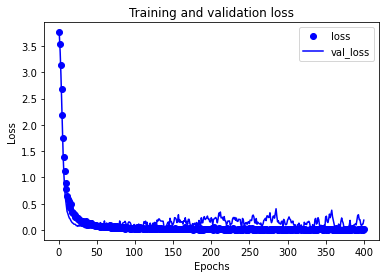

In [184]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss = history.history['val_loss']
print(history_dict.keys())
print(np.argmin(val_loss)+1,"轮")
print(val_loss[np.argmin(val_loss)])

acc = history_dict['acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [186]:
guitar_data=[]
obj_r=open("./test/json/examples3.json")
data=json.load(obj_r)
for file_data in data.items():
    if file_data[1]['instrument_family']==3 and file_data[1]["instrument_source_str"]=="acoustic":
        if 40<=file_data[1]['pitch']<=84:
            guitar_data.append([file_data[1]['note_str'],file_data[1]['pitch']])

for i in wrong_poi:
    print(guitar_data[i][0])

guitar_acoustic_019-043-025
guitar_acoustic_023-083-050
guitar_acoustic_019-060-075
guitar_acoustic_009-045-025
guitar_acoustic_025-077-025
guitar_acoustic_017-049-050
guitar_acoustic_008-063-075
guitar_acoustic_006-051-025
guitar_acoustic_025-069-075
guitar_acoustic_013-064-100
guitar_acoustic_024-067-127
guitar_acoustic_024-040-100
guitar_acoustic_024-060-025
guitar_acoustic_029-043-127
guitar_acoustic_024-077-075
guitar_acoustic_025-052-075
guitar_acoustic_032-055-127
guitar_acoustic_012-052-025
guitar_acoustic_016-062-100
guitar_acoustic_036-078-127
guitar_acoustic_023-069-075
guitar_acoustic_024-058-127
guitar_acoustic_029-069-025
guitar_acoustic_025-057-127
guitar_acoustic_008-060-075
guitar_acoustic_006-046-127
guitar_acoustic_025-067-025
guitar_acoustic_008-075-100
guitar_acoustic_025-068-100
guitar_acoustic_006-081-025
guitar_acoustic_022-045-075
guitar_acoustic_023-082-050
guitar_acoustic_025-067-100
guitar_acoustic_019-042-025
guitar_acoustic_007-051-025
guitar_acoustic_019-

guitar_acoustic_019-079-127
guitar_acoustic_029-042-025
guitar_acoustic_024-057-050
guitar_acoustic_011-047-127
guitar_acoustic_036-064-100
guitar_acoustic_024-064-050
guitar_acoustic_006-084-100
guitar_acoustic_024-067-025
guitar_acoustic_012-058-050
guitar_acoustic_023-053-025
guitar_acoustic_024-073-050
guitar_acoustic_025-064-050
guitar_acoustic_025-061-075
guitar_acoustic_035-049-075
guitar_acoustic_009-071-050
guitar_acoustic_025-067-127
guitar_acoustic_013-059-127
guitar_acoustic_007-046-127
guitar_acoustic_019-056-075
guitar_acoustic_013-049-127
guitar_acoustic_011-049-075
guitar_acoustic_024-066-025
guitar_acoustic_025-059-075
guitar_acoustic_019-050-100
guitar_acoustic_008-079-127
guitar_acoustic_008-082-050
guitar_acoustic_032-055-075


In [ ]:
fre_to_note_piano(0.19842518102208365*2093.004)